<a href="https://colab.research.google.com/github/DamiSoh/Python-Data-Analysis-and-Image-Processing-Tutorial/blob/master/ai04-sc11x-%EC%86%8C%EB%8B%B4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DS SC11x

## Data Preprocessing & Exploratory Data Analysis

## Data Preprocessing

이번 파트에서는 [Gapminder](https://www.gapminder.org/about-gapminder/)의 데이터를 다루게 됩니다.

데이터는 3가지로 구성되어 있으며 description은 다음과 같습니다.

- <https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/gapminder/data1.csv>
- <https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/gapminder/data2.csv>
- <https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/gapminder/data3.csv>

### data1

|geo|time|cell_phones_total|
|:-:|:-:|:-:|
|kor|2017|63658688|
|kor|2018|66355778|
|kor|2019|68892541|

- 지역, 연도, 통화수

### data2

|geo|time|population|
|:-:|:-:|:-:|
|kor|2017|51096415|
|kor|2018|51171706|
|kor|2019|51225308|

- 지역, 연도, 인구수

### data3

|geo|country|
|:-:|:-:|
|kor|South Korea|

- 지역, 나라 이름

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### 1. Load and Explore the Data

- 데이터셋을 데이터프레임으로 불러오세요.
- 결측데이터를 확인하세요.
- `time` vs `cell_phones_total`에 대해서 `scatter plot`을 그리세요.


In [3]:
#데이터셋을 데이터프레임으로 불러오세요.
data1=pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/gapminder/data1.csv')
data2=pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/gapminder/data2.csv')
data3=pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/gapminder/data3.csv')


In [4]:
data1=data1.iloc[:,1:] #unamed지우기 
data2=data2.iloc[:,1:]
data3=data3.iloc[:,1:]


In [5]:
#결측데이터를 확인하세요.
data1.isnull()
data2.isnull()
data3.isnull()

,geo,country
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
268,False,False
269,False,False
270,False,False
271,False,False


하다만거레퍼용으로남겨두기ㅠ

data1에서 0인 결측치 삭제하기 & reset 인덱싱 
rowszero=data1[(data1.cell_phones_total==0)].index
rowszero
data1=data1.drop(rowszero)

data1=data1.reset_index(drop=True)
display(data1)


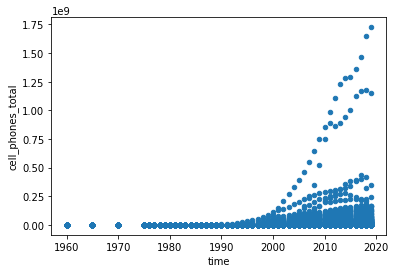

In [6]:
#time vs cell_phones_total에 대해서 scatter plot을 그리세요.
data1.plot.scatter(x='time', y='cell_phones_total');
plt.show()

### 2. Join data

다음 데이터를 만드세요. (shape = 9568 * 5)

|geo|time|cell_phones_total|population|country|
|:-:|:-:|:-:|:-:|:-:|
|abw|1960|0|54211|Aruba|
|...|...|...|...|...|
|zwe|2019|13195902.0|14645468|Zimbabwe|


In [7]:
print(data1.columns, data1.shape)
print(data2.columns, data2.shape)
print(data3.columns, data3.shape)

#join data
new_data=data1.merge(data2, how='inner', on=['geo','time'])
new_data=new_data.merge(data3, how='inner', on=['geo'])

new_data

Index(['geo', 'time', 'cell_phones_total'], dtype='object') (9574, 3)
Index(['geo', 'time', 'population'], dtype='object') (35334, 3)
Index(['geo', 'country'], dtype='object') (273, 2)


,geo,time,cell_phones_total,population,country
0,abw,1960,0.0,54211,Aruba
1,abw,1965,0.0,57360,Aruba
2,abw,1970,0.0,59063,Aruba
3,abw,1975,0.0,60657,Aruba
4,abw,1976,0.0,60586,Aruba
...,...,...,...,...,...
9563,zwe,2015,12757410.0,13814629,Zimbabwe
9564,zwe,2016,12878926.0,14030331,Zimbabwe
9565,zwe,2017,14092104.0,14236595,Zimbabwe
9566,zwe,2018,12908992.0,14438802,Zimbabwe


### 3. Feature Engineering

인구당 cell phone의 수를 표기한 `PPP`라는 feature를 추가하세요. 

그 결과로 2019년 한국에서 PPP가 1.3448이 나와야 합니다. (해당 내역을 보여주세요.)

In [8]:
#PPP 추가하기
new_data['PPP']=new_data['cell_phones_total']/new_data['population']

#2019 한국 PPP 확인하기
KORPPP=new_data.loc[new_data['country']=='South Korea']
KORPPP=KORPPP.loc[KORPPP['time']==2019]
KORPPP


,geo,time,cell_phones_total,population,country,PPP
4805,kor,2019,68892541.0,51225308,South Korea,1.344893


### 4. Data Manipulation

각 나라별로 평균 PPP를 계산하세요.

In [58]:
#각나라별로 평균 PPP를 계산하세요
new_data.groupby('geo').PPP.mean()


geo
abw    0.384005
afg    0.133398
ago    0.124074
alb    0.324242
and    0.347083
         ...   
wsm    0.121033
yem    0.136329
zaf    0.422318
zmb    0.173231
zwe    0.200687
Name: PPP, Length: 213, dtype: float64

가장 많은 PPP 값을 갖는 top 10 country 를 구하세요.

다음과 비슷한 결과가 나와야 합니다. 

|country|PPP|
|:-:|:-:|
|are|0.741916|
|sau|0.757034|
|lie|0.806225|
|hkg|0.810664|
|mac|0.818130|
|isr|0.840197|
|srb|0.951586|
|nld_curacao|1.259227|
|mne|1.574349|
|sxm|1.899506|


In [76]:
#가장 많은 PPP값을 가지는 top 10 country를 구하세요
new_data2=new_data.groupby('geo').PPP.mean()
new_data2=pd.DataFrame(new_data2)
new_data2=new_data2.rename(columns={'geo':'country','PPP':'PPP'})

new_data2=new_data2.sort_values(by='PPP', ascending=False).head(10) #top 10개만 뺴옴
new_data2=new_data2.sort_values(by="PPP", ascending=True) #예시와 동일하게 다시 오름차순으로 정렬 
new_data2



,PPP
geo,
are,0.741916
sau,0.757034
lie,0.806225
hkg,0.810664
mac,0.818130
isr,0.840197
srb,0.951586
nld_curacao,1.259227
mne,1.574349


## EDA
이번 파트에서는 **FiveThirtyEight's article, [Every Guest Jon Stewart Ever Had On ‘The Daily Show’](https://fivethirtyeight.com/features/every-guest-jon-stewart-ever-had-on-the-daily-show/)** 의 데이터를 다루게 됩니다.


아래의 코드는 이미 여러분들을 위해 준비되어 있습니다. 아래 cell 을 실행하면 자동으로 data 가 load 되며, `df`라는 이름의 dataframe 을 얻게 될 겁니다. 

(원하신다면 추가 EDA를 하셔도 상관없지만, 이번 파트에서의 요구사항은 아닙니다.)


In [78]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

cable_news_url = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/media-mentions-2020/cable_weekly.csv'
online_news_url = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/media-mentions-2020/online_weekly.csv'

cable = pd.read_csv(cable_news_url)
online = pd.read_csv(online_news_url)

merged = pd.merge(cable[['date', 'name', 'pct_of_all_candidate_clips']], online[['date', 'name', 'pct_of_all_candidate_stories']])
merged['date'] = pd.to_datetime(merged['date'], infer_datetime_format=True)
merged = merged.set_index('date')

unique_dates = list(set(merged.index.to_list()))

import datetime

joe_biden_cable_multiple = []
joe_biden_online_multiple = []

for date in unique_dates:
  #that_day = merged.loc[datetime.date(year=date.year, month=date.month, day=date.day)]
  str_date = str(date.year)+"-"+str(date.month) + "-" + str(date.day)
  that_day = merged.loc[str_date]

  joe_biden_cable_that_day = that_day[that_day['name']=="Joe Biden"]['pct_of_all_candidate_clips']
  not_joe_biden_cable_max = that_day[that_day['name']!="Joe Biden"]['pct_of_all_candidate_clips'].max()
  joe_biden_cable_multiple_of_max = joe_biden_cable_that_day / not_joe_biden_cable_max

  joe_biden_online_that_day = that_day[that_day['name']=="Joe Biden"]['pct_of_all_candidate_stories']
  not_joe_biden_online_max = that_day[that_day['name']!="Joe Biden"]['pct_of_all_candidate_stories'].max()
  joe_biden_online_multiple_of_max = joe_biden_online_that_day / not_joe_biden_online_max


  joe_biden_cable_multiple.append(joe_biden_cable_multiple_of_max.values[0])
  joe_biden_online_multiple.append(joe_biden_online_multiple_of_max.values[0])

df = pd.DataFrame({'date': unique_dates, 'biden_cable_multiple':joe_biden_cable_multiple, 'biden_online_multiple': joe_biden_online_multiple})
df = df.set_index('date')
df = df.sort_index()

data_for_graph = df.loc[datetime.date(2019, 4, 15):]
print(data_for_graph.shape)
data_for_graph.head()

(27, 2)


,biden_cable_multiple,biden_online_multiple
date,,
2019-04-21,3.087352,1.107492
2019-04-28,3.707641,1.295820
2019-05-05,2.805169,1.306122
2019-05-12,3.235849,1.045386
2019-05-19,2.494624,1.119588


아래의 그림을 따라 그리세요 :

<img src='https://fivethirtyeight.com/wp-content/uploads/2019/10/Mehta-Media1028-1028-1.png' width = 500>



여러분들이 새로 만들게 될 plot은 다음을 만족해야 합니다:
- `example`과 유사한 `Cable News` vs `Online News` 2개의 line graph가 보여야 합니다. 
- 각 라인은 각각 **다른** 색깔을 가져야 합니다. (위 `example` 과 반드시 같은 색일 필요는 없습니다)
- 타이틀을 다음 내용으로 만드세요. _"Biden's Ukraine-related media bump is fading"_


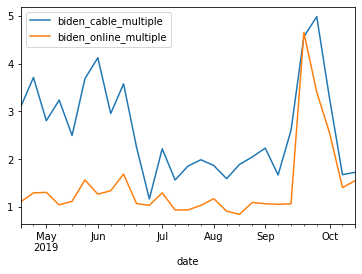

In [91]:
lines=data_for_graph.plot();

## SC 3점 요구사항:

위에서 요구된 사항들을 모두 정확하게 만족하였으며, 아직 시간이 남았다면 아래 2개의 내용들중 하나를 만족하는 경우 3점을 얻을 수 있습니다. 

아래 요구사항들은 모두 **optional** 임을 다시 한 번 강조합니다. (필수 요구사항이 아닙니다.)

## 1. Data Preprocessing

- `cell_phones`dataframe 에서 필터를 걸어 USA 와 china 정보만 담게 하고, scatter plot 을 다시 그려 보세요. 

- geo code 를 lowercase가 아닌 uppercase 로 바꿔보세요. 

- 2017년은 China가 people(인구수)보다 cell phone 개수가 더 많아지는 첫번째 년도 입니다. 
미국의 경우, cell phone의 개수가 people 보다 더 많아지는 첫번째 년도는 언제인가요?

## 2. EDA

- 주어진 fivethirtyeight 그림 차트와 완벽히 동일하게 그려보세요. 
